In [21]:
import numpy as np

import matplotlib.pyplot as plt
from cycler import cycler
from coffea import hist, util
from coffea.processor import accumulate


from ttgamma.utils.plotting import plotWithRatio, RebinHist, SetRangeHist

Load output files

In [22]:
# NOTE: your timestamps will differ!
outputMC = accumulate(
    [
        util.load("Outputs/output_MCTTGamma_run20211216_114449.coffea"),
        util.load("Outputs/output_MCSingleTop_run20211216_124610.coffea"),
        util.load("Outputs/output_MCTTbar1l_run20211216_121317.coffea"),
        util.load("Outputs/output_MCTTbar2l_run20211216_122542.coffea"),
        util.load("Outputs/output_MCWJets_run20211216_142316.coffea"),
        util.load("Outputs/output_MCZJets_run20211216_130754.coffea"),
        util.load("Outputs/output_MCOther_run20211216_165125.coffea"),
    ]
)

outputData = util.load("Outputs/output_Data_run20211216_171828.coffea")

Set up groupings of samples.
Order of dictionary is used for determining plotting order

In [ ]:
grouping= {'$t\overline{t}+\gamma$': ['TTGamma_Dilepton','TTGamma_SingleLept','TTGamma_Hadronic'],
            '$t\overline{t}$'  : ['TTbarPowheg_Dilepton', 'TTbarPowheg_Semilept', 'TTbarPowheg_Hadronic'],
            'Single top':['ST_s_channel', 'ST_tW_channel', 'ST_tbarW_channel', 'ST_tbar_channel', 'ST_t_channel'],
            'W+jets':['W1jets', 'W2jets', 'W3jets', 'W4jets'],
            'Z+jets'  : ['DYjetsM10to50', 'DYjetsM50'],
            'W+$\gamma$' : ['WGamma_01J_5f'],
            'Z+$\gamma$' : ['ZGamma_01J_5f_lowMass'],
            'TTV'    : ['TTWtoLNu','TTWtoQQ','TTZtoLL'],
            'GJets'  : [ 'GJets_HT40To100', 'GJets_HT100To200', 'GJets_HT200To400', 'GJets_HT400To600', 'GJets_HT600ToInf'],
            'QCD'    :['QCD_Pt20to30_Ele', 'QCD_Pt30to50_Ele', 'QCD_Pt50to80_Ele', 'QCD_Pt80to120_Ele', 'QCD_Pt120to170_Ele', 'QCD_Pt170to300_Ele', 'QCD_Pt300toInf_Ele', 'QCD_Pt20to30_Mu', 'QCD_Pt30to50_Mu', 'QCD_Pt50to80_Mu', 'QCD_Pt80to120_Mu', 'QCD_Pt120to170_Mu', 'QCD_Pt170to300_Mu', 'QCD_Pt300to470_Mu', 'QCD_Pt470to600_Mu', 'QCD_Pt600to800_Mu', 'QCD_Pt800to1000_Mu', 'QCD_Pt1000toInf_Mu'],
  }

groupCategory= {"Genuine $\gamma$": slice(1,2),
                "MisID e":slice(2,3),
                "NonPrompt":slice(3,5),
               }


In [24]:
groupCategory = {
    "Prompt": slice(1, 2),
    "MisID": slice(2, 3),
    "NonPrompt": slice(3, 5),
}

# No QCD and TGJets?
grouping = {
    "ttgamma": [
        "TTGamma_Dilepton",
        "TTGamma_SingleLept",
        "TTGamma_Hadronic",
    ],
    "other": [
        "TTbarPowheg_Dilepton",
        "TTbarPowheg_Semilept",
        "TTbarPowheg_Hadronic",
        "W1jets",
        "W2jets",
        "W3jets",
        "W4jets",
        "DYjetsM10to50",
        "DYjetsM50",
        "ST_s_channel",
        "ST_tW_channel",
        "ST_tbarW_channel",
        "ST_tbar_channel",
        "ST_t_channel",
        "TTWtoLNu",
        "TTWtoQQ",
        "TTZtoLL",
        "GJets_HT40To100",
        "GJets_HT100To200",
        "GJets_HT200To400",
        "GJets_HT400To600",
        "GJets_HT600ToInf",
        "ZZ",
        "WZ",
        "WW",
        #"QCD.",
        #"TGJets",

    ],
    "WG": [
        "WGamma",
    ],
    "ZG": [
        "ZGamma_01J_5f_lowMass",
    ],

}

Plot the photon pt spectrum

/opt/conda/lib/python3.8/site-packages/coffea/hist/hist_tools.py:376: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7f699b6780d0>
  warnings.warn(


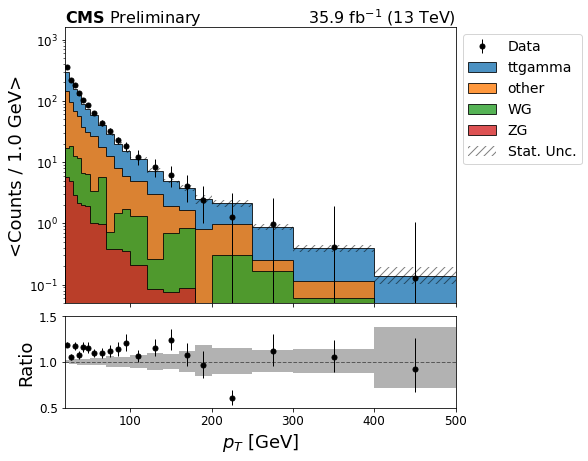

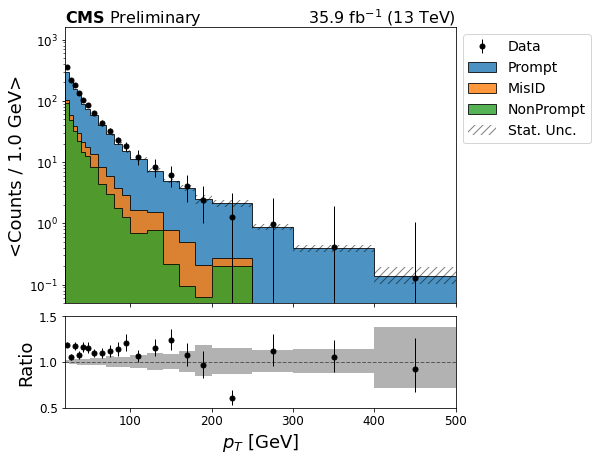

In [25]:
#Get photon pt distribution from coffea output
h = outputMC['photon_pt']

#sum over lepton flavors (get both electron and muon)
h = h.sum('lepFlavor')

#integrate over systematics, selecting only "nominal"
h = h.integrate('systematic','nominal')

#group the datasets into the sample types
h = h.group('dataset',hist.Cat(r'dataset',r'Samples',sorting='placement'),grouping)

#group the photon category axis into the category types listed above
h = h.group('category',hist.Cat(r'category',r'Category',sorting='placement'),groupCategory)

#rebin the pt axis
h = h.rebin("pt",hist.Bin("pt",h.axis("pt").label,np.array([20,25,30,35,40,45,50,60,70,80,90,100,120,140,160,180,200,250,300,400,500])))

hData = outputData['photon_pt'].sum('lepFlavor').sum('systematic').sum('dataset').sum('category')
hData = hData.rebin("pt",hist.Bin("pt",h.axis("pt").label,np.array([20,25,30,35,40,45,50,60,70,80,90,100,120,140,160,180,200,250,300,400,500])))

plotWithRatio(h.sum('category'), hData, overlay='dataset', invertStack=True, binwnorm=1., xRange=[20,500], yRange=[5e-2,None], logY=True,leg='right')
plotWithRatio(h.sum('dataset'), hData, overlay='category', invertStack=True, binwnorm=1., xRange=[20,500], yRange=[5e-2,None], logY=True,leg='right')


/opt/conda/lib/python3.8/site-packages/coffea/hist/hist_tools.py:376: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7f69a471f760>
  warnings.warn(


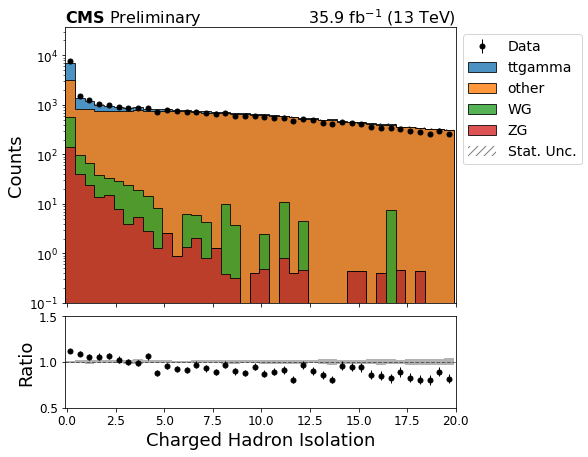

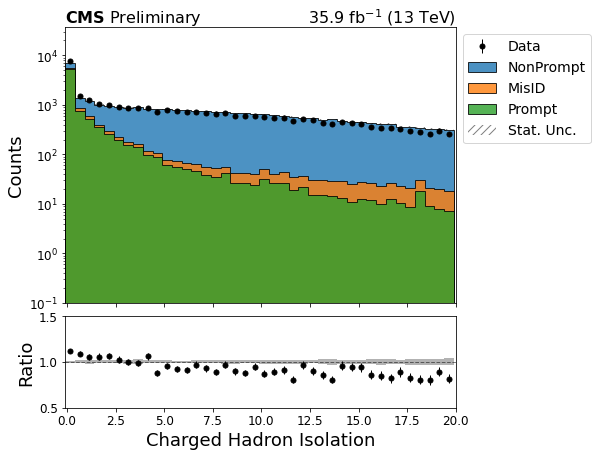

In [7]:
h = outputMC['photon_chIso'].sum('lepFlavor').integrate('systematic','nominal')
h = h.group('dataset',hist.Cat(r'dataset',r'Samples',sorting='placement'),grouping)
h = h.group('category',hist.Cat(r'category',r'Category',sorting='placement'),groupCategory)
h = RebinHist(h,'chIso',10)
hData = outputData['photon_chIso'].sum('lepFlavor').sum('systematic').sum('dataset').sum('category')
hData = RebinHist(hData,'chIso',10)

plotWithRatio(h.sum('category'), hData, overlay='dataset', invertStack=True, xRange=[-.1,20], yRange=[1e-1,None], logY=True,leg='right')
plotWithRatio(h.sum('dataset'), hData, overlay='category', invertStack=False, xRange=[-.1,20], yRange=[1e-1,None], logY=True,leg='right')


/opt/conda/lib/python3.8/site-packages/coffea/hist/hist_tools.py:376: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7f69a471f760>
  warnings.warn(


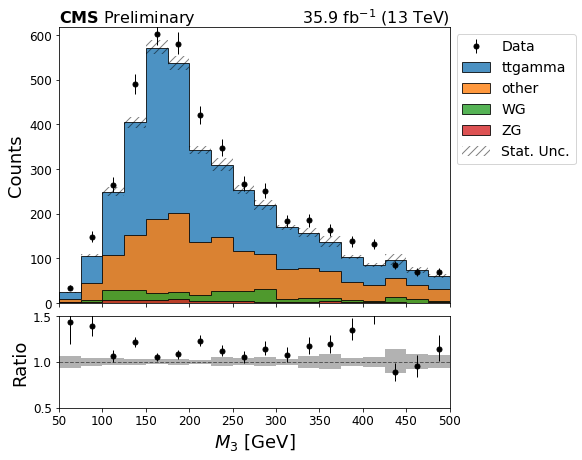

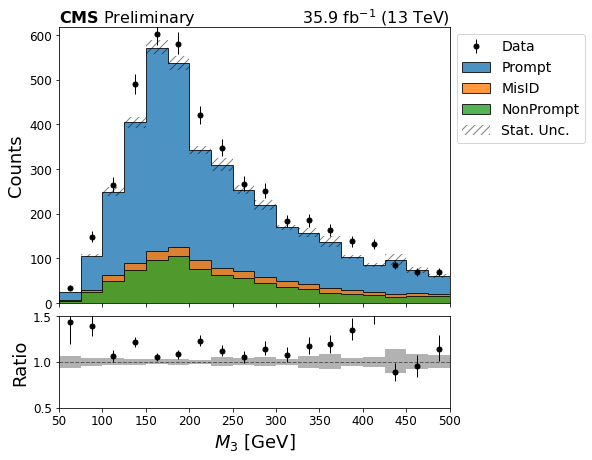

In [8]:
h = outputMC['M3'].integrate('lepFlavor','muon').integrate('systematic','nominal')
h = h.group('dataset',hist.Cat(r'dataset',r'Samples',sorting='placement'),grouping)
h = h.group('category',hist.Cat(r'category',r'Category',sorting='placement'),groupCategory)
h = RebinHist(h,"M3",5)
h = SetRangeHist(h,"M3",50,500)

hData = outputData['M3'].integrate('lepFlavor','muon').sum('systematic').sum('dataset').sum('category')
hData = RebinHist(hData,"M3",5)
hData = SetRangeHist(hData,"M3",50,500)

plotWithRatio(h.sum('category'), hData, overlay='dataset', invertStack=True, leg='right')#, yRange=[1e-1,None], logY=True)
plotWithRatio(h.sum('dataset'), hData, overlay='category', invertStack=True, leg='right')#, yRange=[1e-1,None], logY=True)


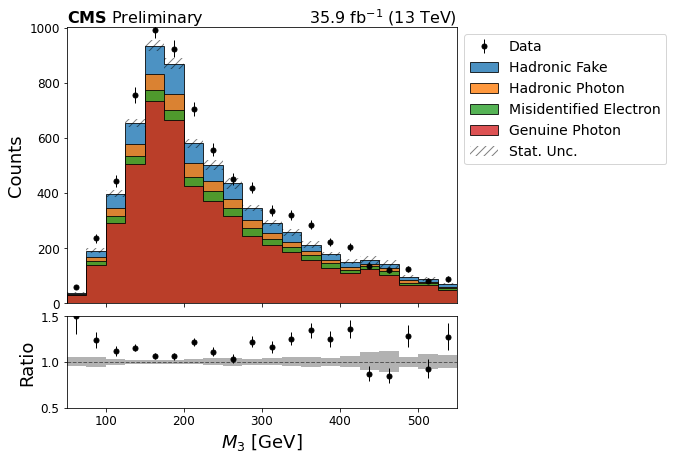

In [17]:
h = outputMC['M3'].sum('lepFlavor').integrate('systematic','nominal')
h = h.group('dataset',hist.Cat(r'dataset',r'Samples',sorting='placement'),grouping)
h = RebinHist(h,"M3",5)
h = SetRangeHist(h,"M3",50,550)

hData = outputData['M3'].sum('lepFlavor').sum('systematic').sum('dataset').sum('category')
hData = RebinHist(hData,"M3",5)
hData = SetRangeHist(hData,"M3",50,550)

plotWithRatio(h.sum('dataset'), hData, overlay='category', invertStack=True, xRange=[50,550], leg='right')#, yRange=[1e-1,None], logY=True)



/opt/conda/lib/python3.8/site-packages/coffea/hist/hist_tools.py:376: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7f69a471f760>
  warnings.warn(


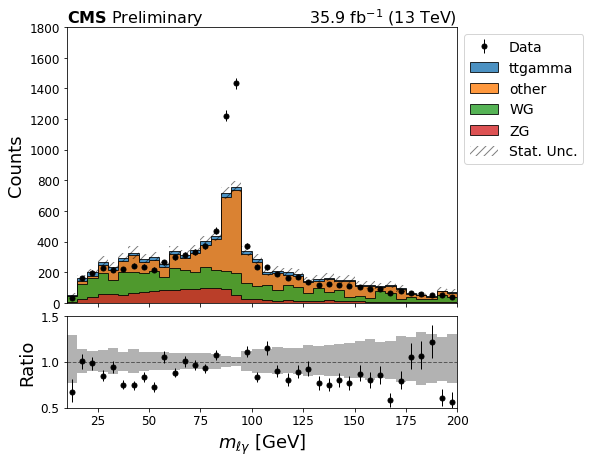

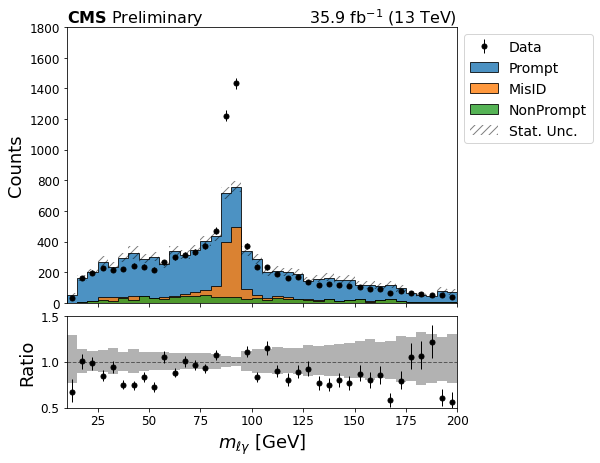

In [18]:
h = outputMC['photon_lepton_mass_3j0t'].integrate('lepFlavor','electron').integrate('systematic','nominal')
h = h.group('dataset',hist.Cat(r'dataset',r'Samples',sorting='placement'),grouping)
h = h.group('category',hist.Cat(r'category',r'Category',sorting='placement'),groupCategory)
#h = h.rebin("mass",5).setRange("mass",10,200)
h = RebinHist(h,"mass",5)
h = SetRangeHist(h,"mass",10,200)

hData = outputData['photon_lepton_mass_3j0t'].integrate('lepFlavor','electron').sum('systematic').sum('dataset').sum('category')
#hData = hData.rebin("mass",5).setRange("mass",10,200)
hData = RebinHist(hData,"mass",5)
hData = SetRangeHist(hData,"mass",10,200)

plotWithRatio(h.sum('category'), hData, overlay='dataset', invertStack=True, yRange=[0,1800], leg='right')
plotWithRatio(h.sum('dataset'), hData, overlay='category', invertStack=True, yRange=[0,1800], leg='right')
